In [1]:
library(TopicScore)
library(Matrix)
getwd()
source("../misc.R")

Warning message:
“package ‘TopicScore’ was built under R version 3.5.2”Warning message:
“package ‘Matrix’ was built under R version 3.5.2”

[1] "/Users/ontheroad/Desktop/git/pyJSMF-RAW/experiments"

In [2]:
datafile="../dataset/sla_simulated/sla_simulated_fastTopics_k6_1.mtx"
Lfile="../dataset/sla_simulated/sla_simulated_fastTopics_k6_1_trueL.csv"
Ffile="../dataset/sla_simulated/sla_simulated_fastTopics_k6_1_trueF.csv"

X = readMM(datafile)
L = read.table(Lfile)
F = read.table(Ffile)
k = ncol(F)

In [3]:
X = as(X, "RsparseMatrix")
fit = topic_score(K = k, X = t(X))

In [4]:
dim(fit$A_hat)

[1] 8382    6

In [5]:
idx = match_topics(F1 = F, F2 = fit$A_hat)
idx 

[1] 2 1 5 6 4 4

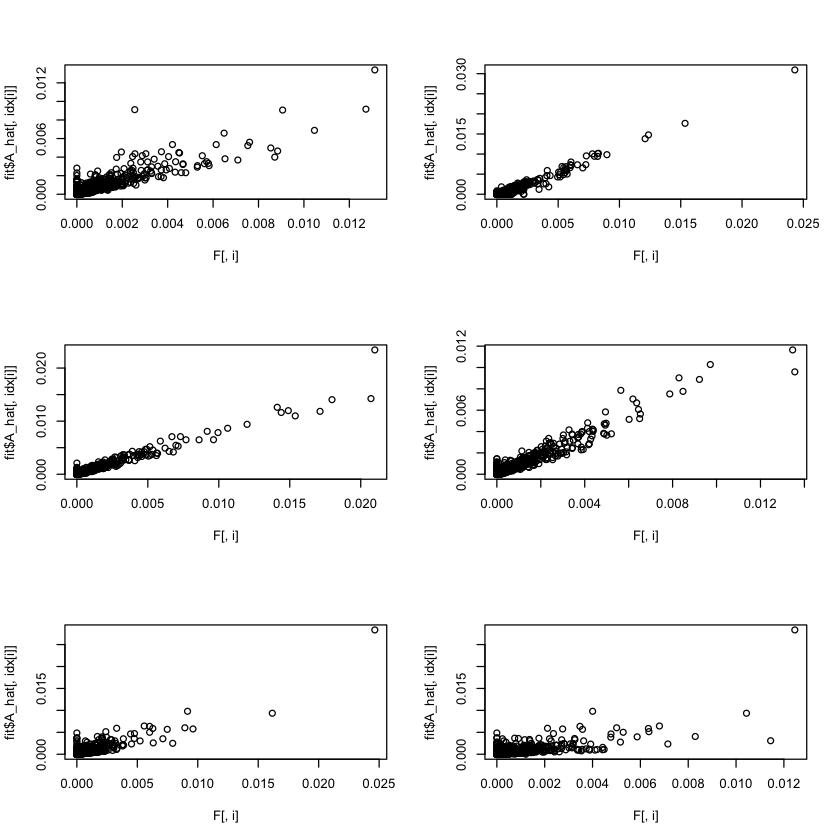

In [6]:
par(mfrow = c(3, 2))
for(i in 1:k){
    plot(F[,i], fit$A_hat[,idx[i]])
}

In [8]:
Xnew = simulate_multinom_counts(as.matrix(L), as.matrix(F), 10 * rowSums(X))
Xnew = as(Xnew, "RsparseMatrix")
fit2 = topic_score(K = k, X = t(Xnew))

In [ ]:
idx = match_topics(F1 = F, F2 = fit$A_hat)
idx 